In [1]:
%load_ext sql

# worked with sqlalchemy-1.4.49
%sql sqlite:///store_transactions.db

'Connected: @store_transactions.db'

In [2]:
%%sql
CREATE TABLE IF NOT EXISTS stores
(
    store_id    INTEGER   PRIMARY KEY, 
    location    TEXT      NOT NULL, -- variable length: string (slow), Also VARCHAR
    manager     CHAR(12)   NOT NULL -- fixed length: string
);

CREATE TABLE IF NOT EXISTS purchases
(
    purchase_id     INTEGER         PRIMARY KEY, 
    store_id        INTEGER         NOT NULL, 
    units_ordered   INTEGER         NOT NULL,
    unit_price      DECIMAL(6,2)    NOT NULL,
    FOREIGN KEY(store_id) REFERENCES stores(store_id)
);

INSERT INTO stores
    (store_id, location, manager)
VALUES 
    (21, 'Sydney, NSW', 'Charles'),
    (95, 'Melbourne, VIC', 'Steve'),
    (64, 'Hobbart, TAS', 'David'),
    (79, 'Perth, WA', 'Ellie');

INSERT INTO purchases
    (purchase_id, store_id, units_ordered, unit_price)
VALUES 
    (54, 21,  6, 15.4),
    (23, 64,  2, 21.2),
    (4,  21, 55, 16.4),
    (5,  21, 63, 14.7),
    (47, 95, 10, 11.5),
    (65, 95, 16, 19.3);

 * sqlite:///store_transactions.db
Done.
Done.
4 rows affected.
6 rows affected.


[]

In [3]:
%%sql
SELECT * FROM stores;

 * sqlite:///store_transactions.db
Done.


store_id,location,manager
21,"Sydney, NSW",Charles
64,"Hobbart, TAS",David
79,"Perth, WA",Ellie
95,"Melbourne, VIC",Steve


In [4]:
%%sql
UPDATE purchases
SET unit_price = 3.67 
WHERE purchase_id = 54;

 * sqlite:///store_transactions.db
1 rows affected.


[]

In [5]:
%%sql
SELECT * FROM purchases
LIMIT 5;

 * sqlite:///store_transactions.db
Done.


purchase_id,store_id,units_ordered,unit_price
4,21,55,16.4
5,21,63,14.7
23,64,2,21.2
47,95,10,11.5
54,21,6,3.67


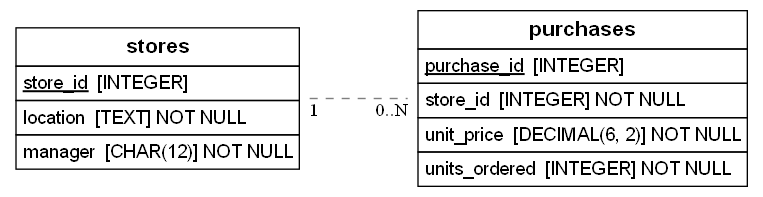

In [6]:
from eralchemy2 import render_er
from IPython.display import Image

database_url = "sqlite:///store_transactions.db"
output_file = "store_er_diagram.png"
render_er(database_url, output_file)
Image(filename=output_file)